In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = 'epigenomic'

In [3]:
feature_df = pd.read_csv('data/' + dataset + '/features.csv')
target_df  = pd.read_csv('data/' + dataset + '/target.csv')

# Drop the specified columns from target_df
target_df_filtered = target_df.drop(columns=['sequenceID', 'max.log.lambda'])

# Concatenate feature_df and the filtered target_df
feature_target_df = pd.concat([feature_df, target_df_filtered], axis=1)

In [4]:
# Replace -inf with NaN
feature_target_df['min.log.lambda'].replace(-np.inf, np.nan, inplace=True)

# Drop rows with NaN values in column 'min.log.lambda'
feature_target_df = feature_target_df.dropna(subset=['min.log.lambda'])

In [5]:
# Replace '#NAME?' with NaN
feature_target_df.replace('#NAME?', 0, inplace=True)

In [6]:
X = feature_target_df[list(feature_target_df.columns)[1:-1]]
y = feature_target_df['min.log.lambda']

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [7]:
# Get feature importances
importances = rf.feature_importances_

# Print the feature importances
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"Feature {feature}: {importances[i]}")

Feature Importances:
Feature quartile.25%: 0.004490458203382838
Feature quartile.50%: 0.03820130271710224
Feature quartile.75%: 0.10180030519788234
Feature quartile.100%: 0.020825128493236686
Feature mean: 0.09029922133167481
Feature sd: 0.036764810256732595
Feature bases: 0.03816497212754814
Feature data: 0.02229719968720133
Feature log+1.quartile.0%: 0.0
Feature log+1.quartile.25%: 0.004446460596168704
Feature log+1.quartile.50%: 0.03508596726340476
Feature log+1.quartile.75%: 0.12400077810868511
Feature log+1.quartile.100%: 0.019845698026091922
Feature log+1.mean: 0.07753353072514434
Feature log+1.sd: 0.03277579780691267
Feature log+1.bases: 0.03708869924350471
Feature log+1.data: 0.021243142631659186
Feature log.quartile.100%: 0.021512370272915804
Feature log.mean: 0.0927054124701487
Feature log.sd: 0.03938956027941624
Feature log.bases: 0.03856760782018685
Feature log.data: 0.021714668170168497
Feature log.log.quartile.100%: 0.02120786061066489
Feature log.log.bases: 0.03763419554

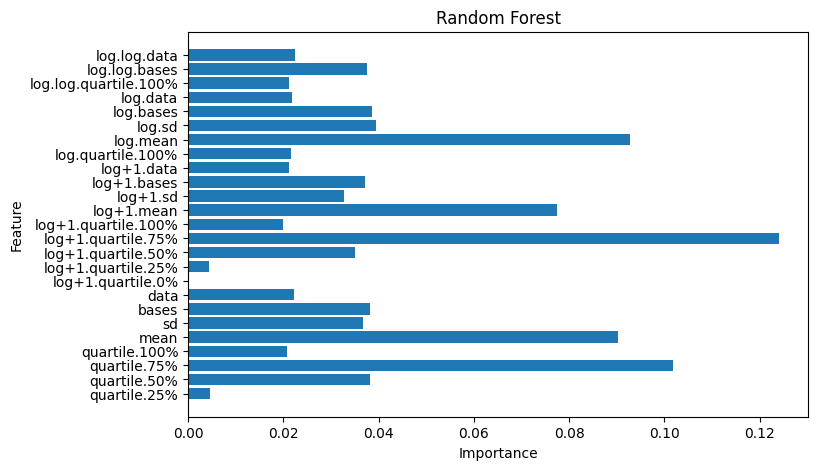

In [8]:
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest")
# plt.savefig("figs/random_forest.png", format='png')
plt.show()

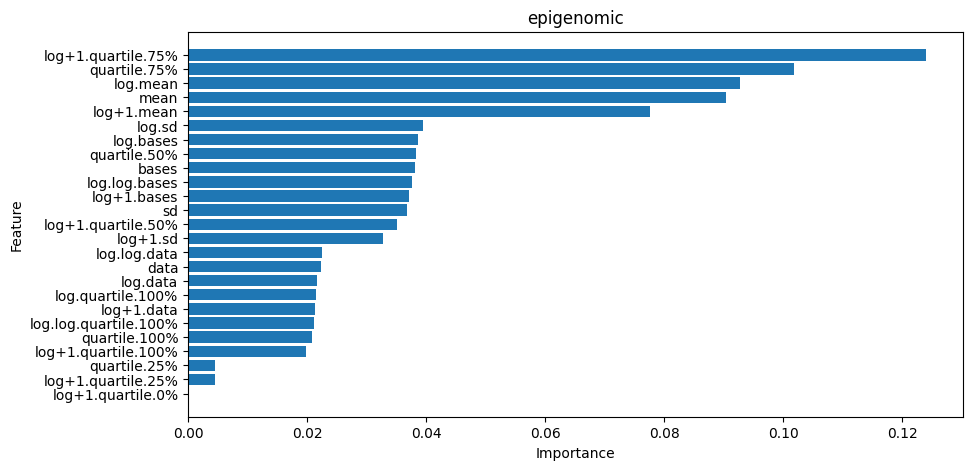

In [9]:
# Sort the importances and corresponding feature names
sorted_indices = np.argsort(importances)
sorted_importances = importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(dataset)
plt.savefig("figs/random_forest_" + dataset + ".png")
plt.show()